In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd

In [2]:
import fun_CondProb as fn

In [3]:
ssp='ssp585'
path = f'/projects/kopp/facts-experiments/221217/coupling.{ssp}/output/'
files=fn.list_files_with_names(path, ["global", "AIS"])
#
df = pd.DataFrame(files, columns=['File Name']).reset_index().rename(columns={'index': 'Index'})
# print(df.to_string(index=False))

In [4]:
ssp='ssp585'
path20k = f'/scratch/pk695/FACTS/002_fork/facts/experiments-DUMP/experiments.TEST/exp_k14/coupling.{ssp}.20k/output'
files20k=fn.list_files_with_names(path20k, ["global", "AIS"])
files20k
#
df20k = pd.DataFrame(files20k, columns=['File Name']).reset_index().rename(columns={'index': 'Index'})
# print(df.to_string(index=False))

In [5]:
#
start_year=2020; end_year=2300; unit='cm'; station=0

# AIS from the Kopp_14 module.
AIS_k14_path=f'{path20k}/coupling.ssp585.20k.k14ice.kopp14.icesheets_AIS_globalsl.nc'
var = 'k14'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

# AIS from the Deconto_16 module.
AIS_d16_path=f'{path20k}/coupling.ssp585.20k.deconto16.deconto16.AIS_AIS_globalsl.nc'
var = 'd16'; exec(f"{var}_dat, {var}_slc, {var}_time, {var}_lat, {var}_lon = fn.extract_nc_info(AIS_{var}_path, station, unit, start_year, end_year)")

In [6]:
def get_axis_data(dum_slc, dum_time, *specific_year):
    return [dum_slc[:, dum_time == t].squeeze() for t in specific_year]

In [7]:
T1=2020; T2=2100; T3=2300;

var = 'k14'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3})")
var = 'd16'; exec(f"{var}_{T1}, {var}_{T2}, {var}_{T3} = get_axis_data({var}_slc, {var}_time, {T1}, {T2}, {T3})")

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
    Plot::
</span>
<br>
<br>
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: black;"> kopp14.icesheets_AIS </span>

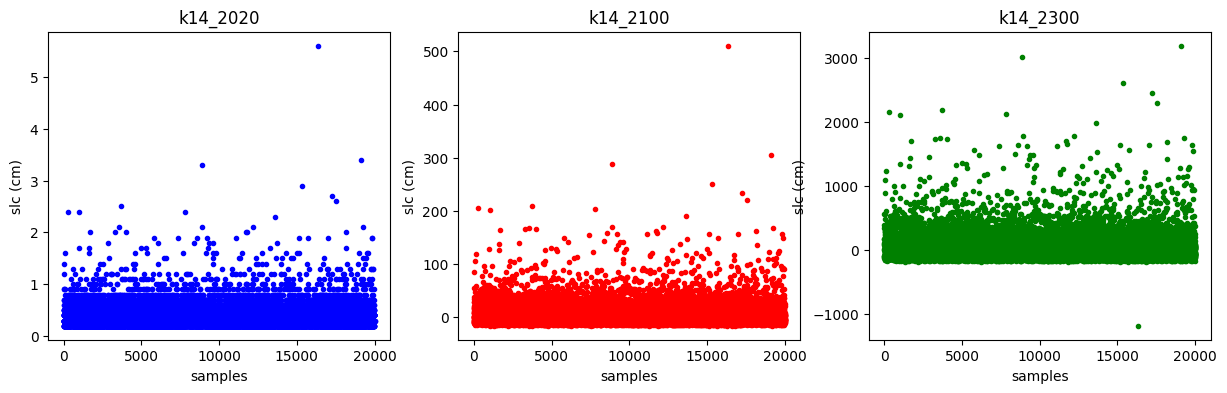

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
var = 'k14'; T1=2020; T2=2100; T3=2300;  
ax[0].plot(eval(f'{var}_{T1}'), color='b', marker='.', linestyle='none'); ax[0].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T1}');
ax[1].plot(eval(f'{var}_{T2}'), color='r', marker='.', linestyle='none'); ax[1].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T2}');
ax[2].plot(eval(f'{var}_{T3}'), color='g', marker='.', linestyle='none'); ax[2].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T3}');

<br>
<br>
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: black;"> deconto16.AIS </span>

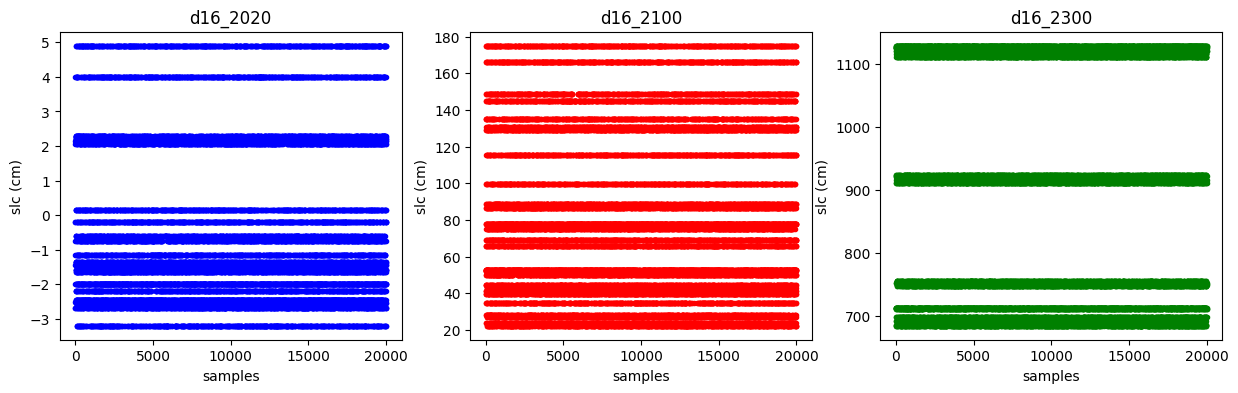

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
var = 'd16'; T1=2020; T2=2100; T3=2300;  
ax[0].plot(eval(f'{var}_{T1}'), color='b', marker='.', linestyle='none'); ax[0].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T1}');
ax[1].plot(eval(f'{var}_{T2}'), color='r', marker='.', linestyle='none'); ax[1].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T2}');
ax[2].plot(eval(f'{var}_{T3}'), color='g', marker='.', linestyle='none'); ax[2].set(ylabel='slc (cm)', xlabel='samples', title=f'{var}_{T3}');

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
    PLOT Figure 5 from   
    <a href="https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2017EF000663/"><b>Kopp et al 2017</b></a>
</span>


<br>
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: black;">
    :: PLOT :: <span style="color: red;">AIS_k14  ,  AIS_d16
</span>

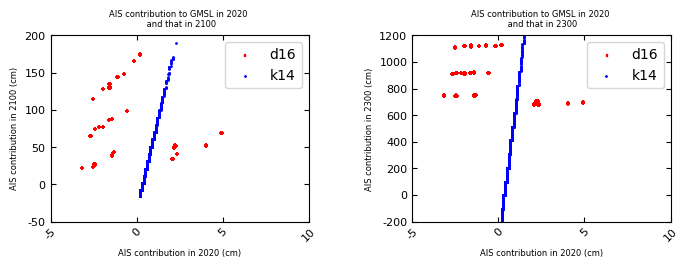

In [10]:
fig = plt.figure(figsize=(8, 15))
gs = gridspec.GridSpec(5, 2, figure=fig);  
plt.subplots_adjust(wspace=0.4, hspace=0.3)
# ==============================================================================================================
# PLOT left panel.<
plot_info = {
    'x_label': 'AIS contribution in 2020 (cm)', 'y_label': 'AIS contribution in 2100 (cm)', 
    'title': 'AIS contribution to GMSL in 2020 \n and that in 2100',
    'x_lim': (-5, 10), 'x_ticks': np.arange(-5, 11, 5),
    'y_lim': (-50, 200), 'y_ticks': np.arange(-50, 201, 50),
    'label1': 'd16' , 'label2': 'k14'
}
ax = fig.add_subplot(gs[0, 0])
fn.sub_plot(ax, d16_2020, d16_2100, k14_2020, k14_2100, plot_info)
#
# PLOT right panel.<
plot_info = {
    'x_label': 'AIS contribution in 2020 (cm)', 'y_label': 'AIS contribution in 2300 (cm)', 
    'title': 'AIS contribution to GMSL in 2020 \n and that in 2300',
    'x_lim': (-5, 10), 'x_ticks': np.arange(-5, 11, 5),
    'y_lim': (-200, 1200), 'y_ticks': np.arange(-200, 1201, 200),
    'label1': 'd16' , 'label2': 'k14'
}
ax = fig.add_subplot(gs[0,1])
fn.sub_plot(ax, d16_2020, d16_2300, k14_2020, k14_2300, plot_info)
# ax = fig.add_subplot(gs[1, :])

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
    PLOT contour like in 
    <a href=" https://doi.org/10.1029/2019JF005418"><b>Gilford20</b></a>
    Figure_4b
</span>


In [11]:
# clevels=np.linspace(np.log(1e-3),np.log(0.3),11)
# clabels=np.round(np.exp(clevels),decimals=3).astype('str')

<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<span style="font-family: 'Times New Roman'; font-size: 22pt; color: green;">
    PLOT PDF's 
</span>


Text(0.95, 0.95, 'k14')

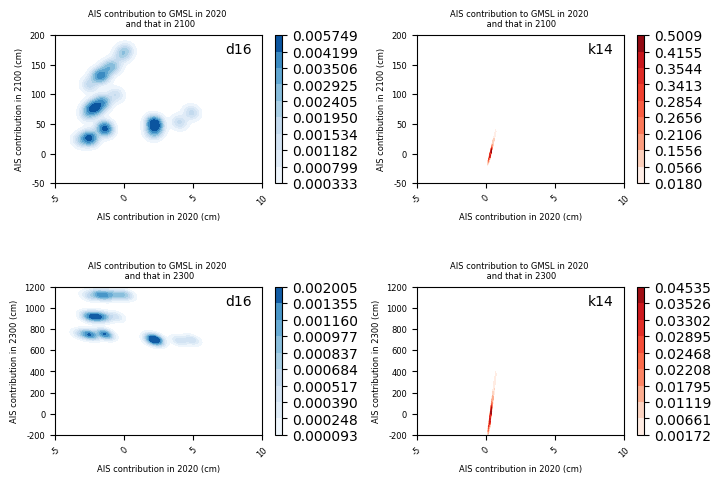

In [12]:
fig = plt.figure(figsize=(8, 15))
gs = gridspec.GridSpec(5, 2, figure=fig);  
plt.subplots_adjust(wspace=0.4, hspace=0.7)
# ==============================================================================================================
# PLOT left panel.<
ax = fig.add_subplot(gs[0, 0])
sns.kdeplot(x=d16_2020, y=d16_2100, fill=True, cmap="Blues", cbar=True)
#
# cbar = ax.collections[0].colorbar
# cbar.set_norm(LogNorm(vmin=np.min(d16_2020), vmax=np.max(d16_2300)))
#
ax.set_title("AIS contribution to GMSL in 2020 \n and that in 2100", fontsize=6)
ax.set_xlabel("AIS contribution in 2020 (cm)", fontsize=6)
ax.set_ylabel("AIS contribution in 2100 (cm)", fontsize=6)
ax.set_xlim(-5, 10)
ax.set_ylim(-50, 200)
ax.set_xticks(np.arange(-5, 11, 5));  ax.set_xticklabels(np.arange(-5, 11, 5),fontsize=6, rotation=45);
ax.set_yticks(np.arange(-50, 201, 50));  ax.set_yticklabels(np.arange(-50, 201, 50),fontsize=6) ;
ax.text(0.95, 0.95, 'd16', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=10)


# PLOT right panel.<
ax = fig.add_subplot(gs[0, 1])
sns.kdeplot(x=k14_2020, y=k14_2100, fill=True, cmap="Reds", cbar=True)
ax.set_title("AIS contribution to GMSL in 2020 \n and that in 2100", fontsize=6)
ax.set_xlabel("AIS contribution in 2020 (cm)", fontsize=6)
ax.set_ylabel("AIS contribution in 2100 (cm)", fontsize=6)
ax.set_xlim(-5, 10)
ax.set_ylim(-50, 200)
ax.set_xticks(np.arange(-5, 11, 5));  ax.set_xticklabels(np.arange(-5, 11, 5),fontsize=6, rotation=45);
ax.set_yticks(np.arange(-50, 201, 50));  ax.set_yticklabels(np.arange(-50, 201, 50),fontsize=6) ;
ax.text(0.95, 0.95, 'k14', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=10)


# PLOT bottom left panel.<
ax = fig.add_subplot(gs[1, 0])
sns.kdeplot(x=d16_2020, y=d16_2300, fill=True, cmap="Blues", cbar=True)
ax.set_title("AIS contribution to GMSL in 2020 \n and that in 2300", fontsize=6)
ax.set_xlabel("AIS contribution in 2020 (cm)", fontsize=6)
ax.set_ylabel("AIS contribution in 2300 (cm)", fontsize=6)
ax.set_xlim(-5, 10)
ax.set_ylim(-200, 1200)
ax.set_xticks(np.arange(-5, 11, 5));  ax.set_xticklabels(np.arange(-5, 11, 5),fontsize=6, rotation=45);
ax.set_yticks(np.arange(-200, 1201, 200));  ax.set_yticklabels(np.arange(-200, 1201, 200),fontsize=6) ;
ax.text(0.95, 0.95, 'd16', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=10)

# PLOT bottom right panel.<
ax = fig.add_subplot(gs[1, 1])
sns.kdeplot(x=k14_2020, y=k14_2300, fill=True, cmap="Reds", cbar=True)
ax.set_title("AIS contribution to GMSL in 2020 \n and that in 2300", fontsize=6)
ax.set_xlabel("AIS contribution in 2020 (cm)", fontsize=6)
ax.set_ylabel("AIS contribution in 2300 (cm)", fontsize=6)
ax.set_xlim(-5, 10)
ax.set_ylim(-50, 200)
ax.set_xticks(np.arange(-5, 11, 5));  ax.set_xticklabels(np.arange(-5, 11, 5),fontsize=6, rotation=45);
ax.set_yticks(np.arange(-200, 1201, 200));  ax.set_yticklabels(np.arange(-200, 1201, 200),fontsize=6) ;
ax.text(0.95, 0.95, 'k14', horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=10)



<hr style="border: none; height: 2px; background-color: none; border-style: dotted;">
<span style="font-size: 16pt; color: blue; font-family: 'Times New Roman';"> Colorbar with a log Scale </span>

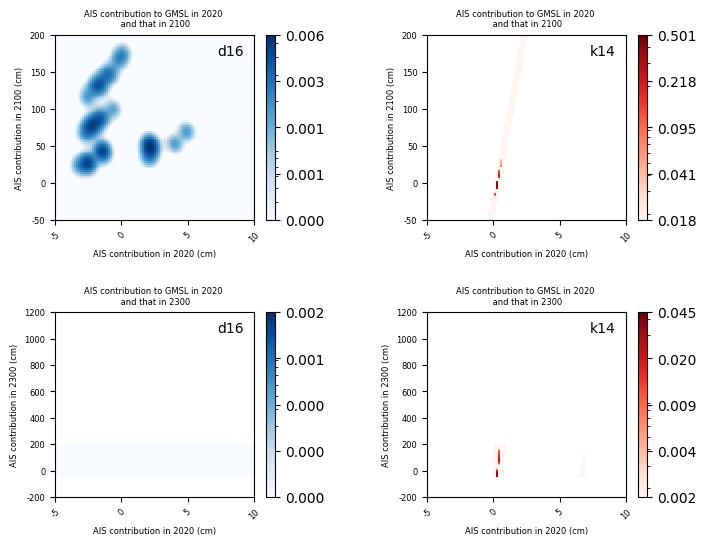

In [13]:
#
fig = plt.figure(figsize=(8, 6))
gs = fig.add_gridspec(2, 2)
fig.subplots_adjust(wspace=0.5, hspace=0.5) 
#
#
#
#
#--------------------------1--------------------------------------------
ax1 = fig.add_subplot(gs[0, 0])
VAR1=d16_2020
VAR2=d16_2100 
VAR_name='d16'
TVAR1 = 2020
TVAR2 = 2100
#
fn.log_plot(VAR1,VAR2,VAR_name,TVAR1,TVAR2,-5, 10, 100,
            -50, 200, 100,1e-3,'Blues', 5, 
            -5, 1, 10, 5, 
            -50, 1, 200,50, 'AIS',ax1,fig,
           0.0003,0.0057)
#------------------------------2----------------------------------------
ax2 = fig.add_subplot(gs[0, 1])
VAR1=k14_2020
VAR2=k14_2100 
VAR_name='k14'
TVAR1 = 2020
TVAR2 = 2100
#
fn.log_plot(VAR1,VAR2,VAR_name,TVAR1,TVAR2,
            -5, 10, 100,-50, 200, 100,
            1e-3,'Reds', 5, 
            -5, 1, 10, 5, 
            -50, 1, 200,50, 'AIS',ax2,fig,
           0.0180,0.5009)
#-----------------------------3-----------------------------------------
ax3 = fig.add_subplot(gs[1, 0])
VAR1=d16_2020
VAR2=d16_2300 
VAR_name='d16'
TVAR1 = 2020
TVAR2 = 2300
#
fn.log_plot(VAR1,VAR2,VAR_name,TVAR1,TVAR2,
            -5, 10, 100,-50, 200, 100,
            1e-3,'Blues', 5, 
            -5, 1, 10, 5, 
            -200, 1, 1200,200, 'AIS',ax3,fig,
           0.000093,0.002005)
#-----------------------------4-----------------------------------------
ax4 = fig.add_subplot(gs[1, 1])
VAR1=k14_2020
VAR2=k14_2300 
VAR_name='k14'
TVAR1 = 2020
TVAR2 = 2300
#
fn.log_plot(VAR1,VAR2,VAR_name,TVAR1,TVAR2,
            -5, 10, 100,-50, 200, 100,
            1e-3,'Reds', 5, 
            -5, 1, 10, 5, 
            -200, 1, 1200,200, 'AIS',ax4,fig,
           0.00172,0.04535)
#----------------------------------------------------------------------